## Setup

In [1]:
# Importing the necessary modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from tqdm import tqdm
import warnings
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix
from sklearn.cluster import DBSCAN 
import numpy as np
warnings.filterwarnings('ignore')

In [3]:
# 项目数据下载 在网页版的笔记本中对df运行
# 将DataFrame转换为CSV格式的字符串
# csv_data = df.to_csv(index=False)

# 创建一个HTML链接,点击后将CSV数据传递给浏览器下载
# html = f"<a href='data:text/csv;charset=utf-8,{csv_data}' download='data.csv'>Download CSV File</a>"

# 在Notebook单元格中显示HTML链接
# from IPython.display import HTML
# display(HTML(html))

In [4]:
dataset = pd.read_csv("Mall_Customers.csv")
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Data Exploration

In [5]:
print('There are {} rows and {} columns in our dataset'.format(dataset.shape[0],dataset.shape[1]))

There are 200 rows and 5 columns in our dataset


In [6]:
dataset.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [9]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


可以看到最大最小相差很大的项目。存在异常值。

In [10]:
dataset.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [11]:
print(f"The number of customers are {dataset['CustomerID'].nunique()}")
print(f"It matches with the number of rows of the dataframe which are {dataset.shape[0]}.")

The number of customers are 200
It matches with the number of rows of the dataframe which are 200.


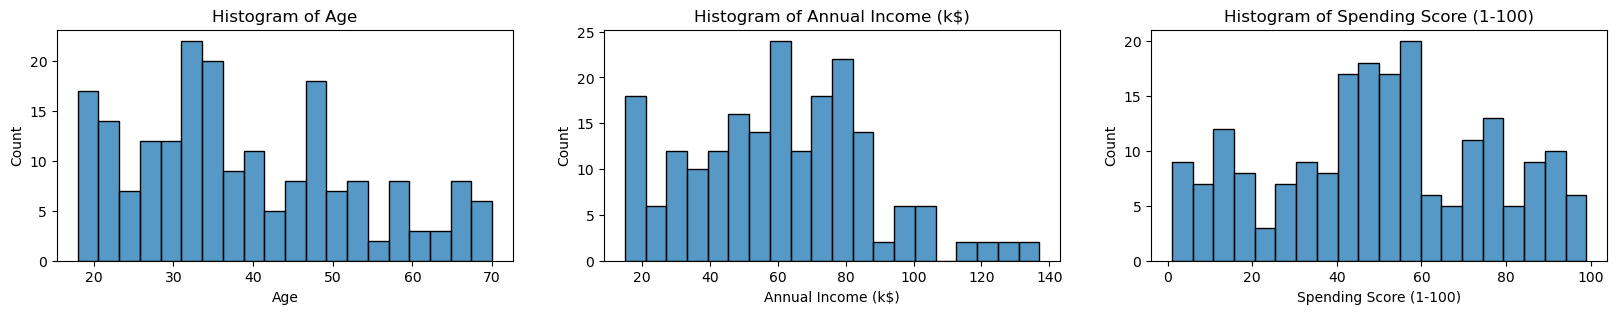

In [12]:
# plot the histogram of the numerical column
plt.rcParams["figure.figsize"] = (20, 3)
for idx, x in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)']):
    plt.subplot(1, 3, idx + 1)
    sns.histplot(dataset[x] , bins = 20)
    plt.title(f'Histogram of {x}')
plt.show()

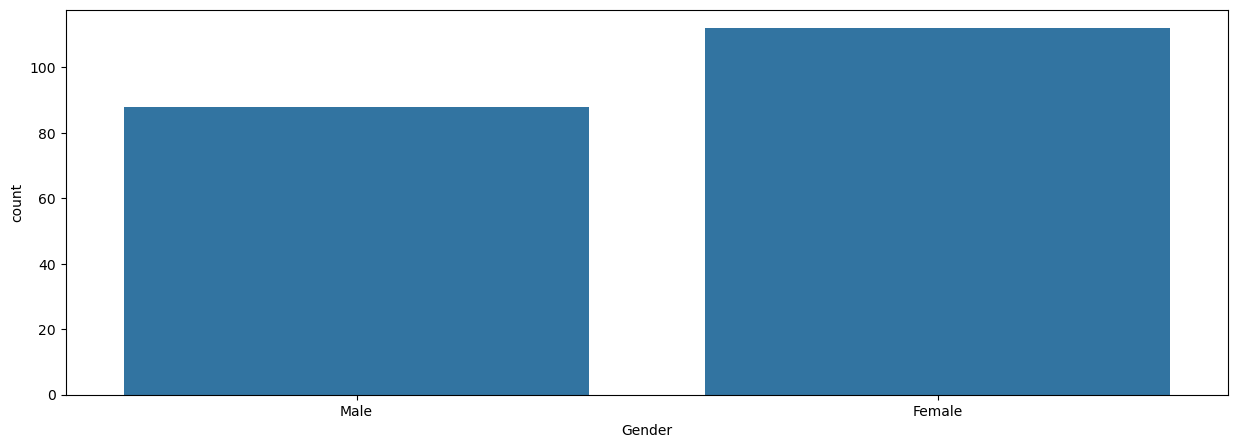

In [13]:
# plot the bar for object column
plt.figure(1 , figsize = (15 , 5))
sns.countplot(x = 'Gender' , data = dataset)
plt.show()

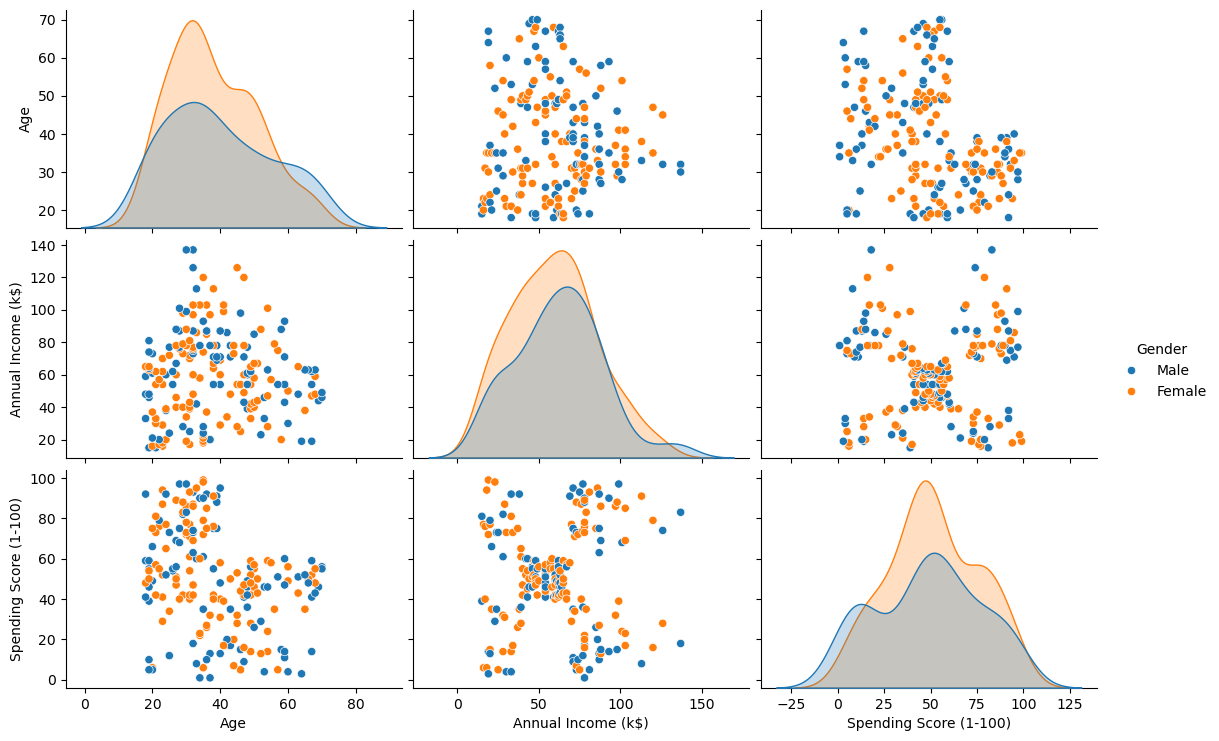

In [14]:
# plot the pairplot showing the scatter plot between the respective numerical columns.
# hue='Gender'参数指定了按照'Gender'列中的值对数据点进行着色,这样可以在图中直观地区分不同性别。
# aspect=1.5参数控制图形的宽高比,值为1.5意味着图形的宽度是高度的1.5倍。
sns.pairplot(dataset.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

## Clustering

使用如下三种方法进行聚类：

- KMeans Clustering
- Hierarchical Clustering
- DbScan Clustering

基于如下特征进行：

- Annual Income (k$)
- Spending Score (1-100)

In [15]:
filtered_dataset = dataset[["Annual Income (k$)", "Spending Score (1-100)"]]
filtered_dataset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


### K-means

下面这段，在给定的数据集filtered_dataset上尝试不同数量的聚类(从1到10个聚类)，并记录每个聚类数量下的"簇内平方和"(Within-Cluster Sum of Squares, WCSS)。WCSS是一个评估聚类质量的指标，值越小表示聚类的质量越好。

In [16]:
wcss=[]  # This list stores the within clusters sum of squares for a given clustering

# We will try clusters from 1 to 11 and then record the within clusters sum of squares for each cluster
for i in tqdm(range(1,11)): 
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(filtered_dataset)
    wcss.append(kmeans.inertia_) # inertia_属性存储了该聚类的WCSS值

100%|███████████████████████████████████████████| 10/10 [00:00<00:00, 23.81it/s]


Elbow Method （肘部法则）

Elbow 方法用于找到形成簇的最佳数量。 在下图中，我们将能够看到正在形成的肘状结构。 形成肘状结构的点为我们提供了最佳的簇数。 在 x 轴上，我们取簇的数量，在 y 轴上，我们取与每个簇对应的簇内平方和。

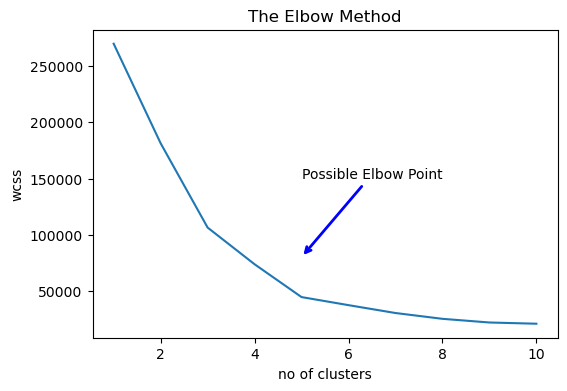

In [20]:
fig, ax = plt.subplots(figsize=(6, 4))
sns.lineplot(x=list(range(1, 11)), y=wcss, ax=ax)
ax.set_title('The Elbow Method')
ax.set_xlabel('no of clusters')
ax.set_ylabel('wcss')

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(5, 80000), xytext=(5, 150000), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='blue', lw=2))
# 这一行在图形上添加了一个注释和箭头,用于标记可能的"肘部点"。annotate 函数在图形上添加注释文本。
# xy 参数指定注释文本的位置, xytext 参数指定文本框的位置, xycoords='data' 表示使用数据坐标系。arrowprops 参数设置了箭头的样式和颜色。

plt.show()

From the above plot we can see that the elbow like structure is being formed at points 3 and 5. So this shows us that the optimal number of clusters can be either 3 or 5. We will be going with 5 clusters.

[2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2 3 2
 3 2 3 2 3 2 0 2 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 4 1 4 0 4 1 4 1 4 0 4 1 4 1 4 1 4 1 4 0 4 1 4 1 4
 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4 1
 4 1 4 1 4 1 4 1 4 1 4 1 4 1 4]


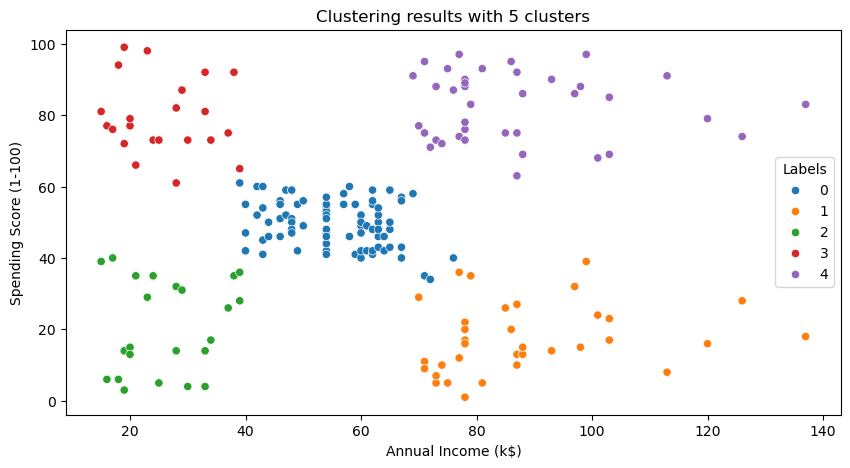

In [23]:
# Doing the clustering with 5 clusters
kmeans_model = KMeans(n_clusters=5, init="k-means++", random_state=42).fit(filtered_dataset)
print(kmeans_model.labels_)
filtered_dataset['Labels'] = kmeans_model.labels_

# Plotting the clusters on the Screen
plt.figure(figsize=(10, 5))
sns.scatterplot(x=filtered_dataset['Annual Income (k$)'],
                y=filtered_dataset['Spending Score (1-100)'], 
                hue=filtered_dataset['Labels'], 
                palette=sns.color_palette("tab10", 5))
plt.title('Clustering results with 5 clusters')
plt.show()

聚类解释

- 左上角显示的集群向我们展示了年收入低但支出得分高的客户。
- 左下角所示的集群向我们展示了年收入低且支出分数低的客户。
- 中间显示的集群向我们展示了具有平均年收入和平均支出得分的客户。
- 右上角显示的集群向我们展示了年收入高且消费得分高的客户。
- 右下角的集群向我们展示了年收入高、消费得分低的客户。
- 消费得分高的客户可能是企业高管增加收入的潜在目标。

### Hierarchical Clustering

现在我们将在给定的问题上应用层次聚类。

我们将使用 Scikit Learn 库提供的聚合聚类模块：

- n_clusters：要查找的簇的数量。
- linkage：连接标准决定了观察组之间使用的距离。 它可以采用以下值：
  - “ward”最大限度地减少了正在合并的簇的方差。
  - “average”使用两组每个观察值的距离平均值。
  - “complete”或“maximum”链接使用两组所有观察值之间的最大距离。
  - “single”使用两组所有观测值之间距离的最小值。

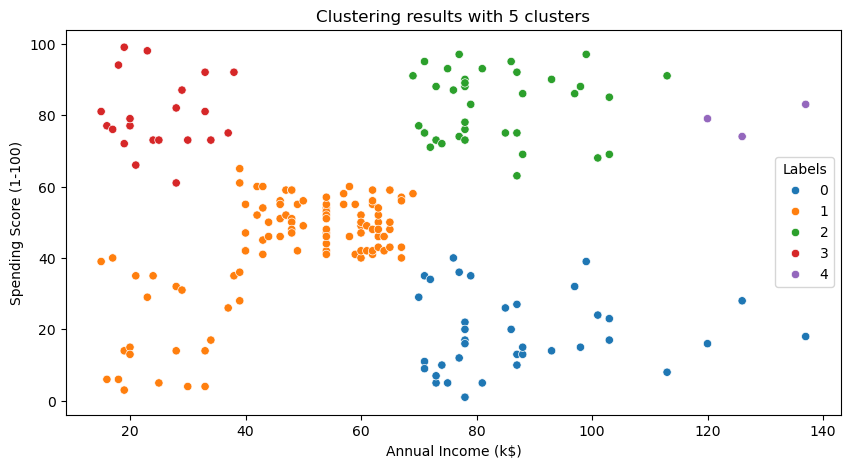

In [25]:
agglomerative_model = AgglomerativeClustering(n_clusters=5, linkage='average').fit(filtered_dataset)
filtered_dataset['Labels'] = agglomerative_model.labels_

plt.figure(figsize=(10, 5))
sns.scatterplot(x=filtered_dataset['Annual Income (k$)'],
                y=filtered_dataset['Spending Score (1-100)'], 
                hue=filtered_dataset['Labels'], 
                palette=sns.color_palette("tab10", 5))
plt.title('Clustering results with 5 clusters')
plt.show()

- 聚类解释Clustering Interpretation

我们可以用与 KMeans 聚类相同的方式解释聚类结果。
我们可以看到年收入低、支出得分低的客户以及平均年收入和平均支出得分的客户如何位于一个集群中。

- 树状图Dendrogram

树状图通过在非单一簇及其子簇之间绘制 U 形链接来说明每个簇的组成方式。 U 形链接的顶部表示集群合并。 U 形链接的两条腿指示哪些簇已合并。 U 形链接两条腿的长度代表子簇之间的距离。 它也是两个子簇中原始观测值之间的同表距离。

下面这段代码用于绘制层次聚类树状图(Dendrogram)。

```python
dist = distance_matrix(filtered_dataset, filtered_dataset)
```
这行代码计算了输入数据集`filtered_dataset`中所有数据点之间的距离,并将这些距离值存储在`dist`变量中。`distance_matrix`函数来自`scipy.spatial.distance`模块,它可以计算两个数据集之间的成对距离。在这里,我们传入了同一个数据集两次,以计算该数据集内部所有数据点之间的距离。

```python
Z = hierarchy.linkage(dist, 'average')
```
这行代码执行层次聚类算法,并将结果存储在`Z`变量中。`hierarchy.linkage`函数来自`scipy.cluster.hierarchy`模块,它基于输入的距离矩阵`dist`执行层次聚类,并返回一个编码有层次结构信息的矩阵`Z`。`'average'`参数指定了使用平均链接的聚类方法。

```python
plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')
```
这两行代码绘制层次聚类树状图(Dendrogram)。首先,创建一个大小为`(18, 50)`英寸的图像窗口。然后,`hierarchy.dendrogram`函数根据上一步得到的层次结构矩阵`Z`绘制树状图。`leaf_rotation=0`参数设置叶节点(代表数据点)的旋转角度为0度,`leaf_font_size=12`设置叶节点字体大小为12,`orientation='right'`参数使树状图横向绘制。

在这个图中,每个叶节点代表一个数据点,而内部节点则代表簇的合并情况。通过观察树状图的分支结构,可以直观地了解数据点之间的相似性,并根据需要选择合适的聚类层次。

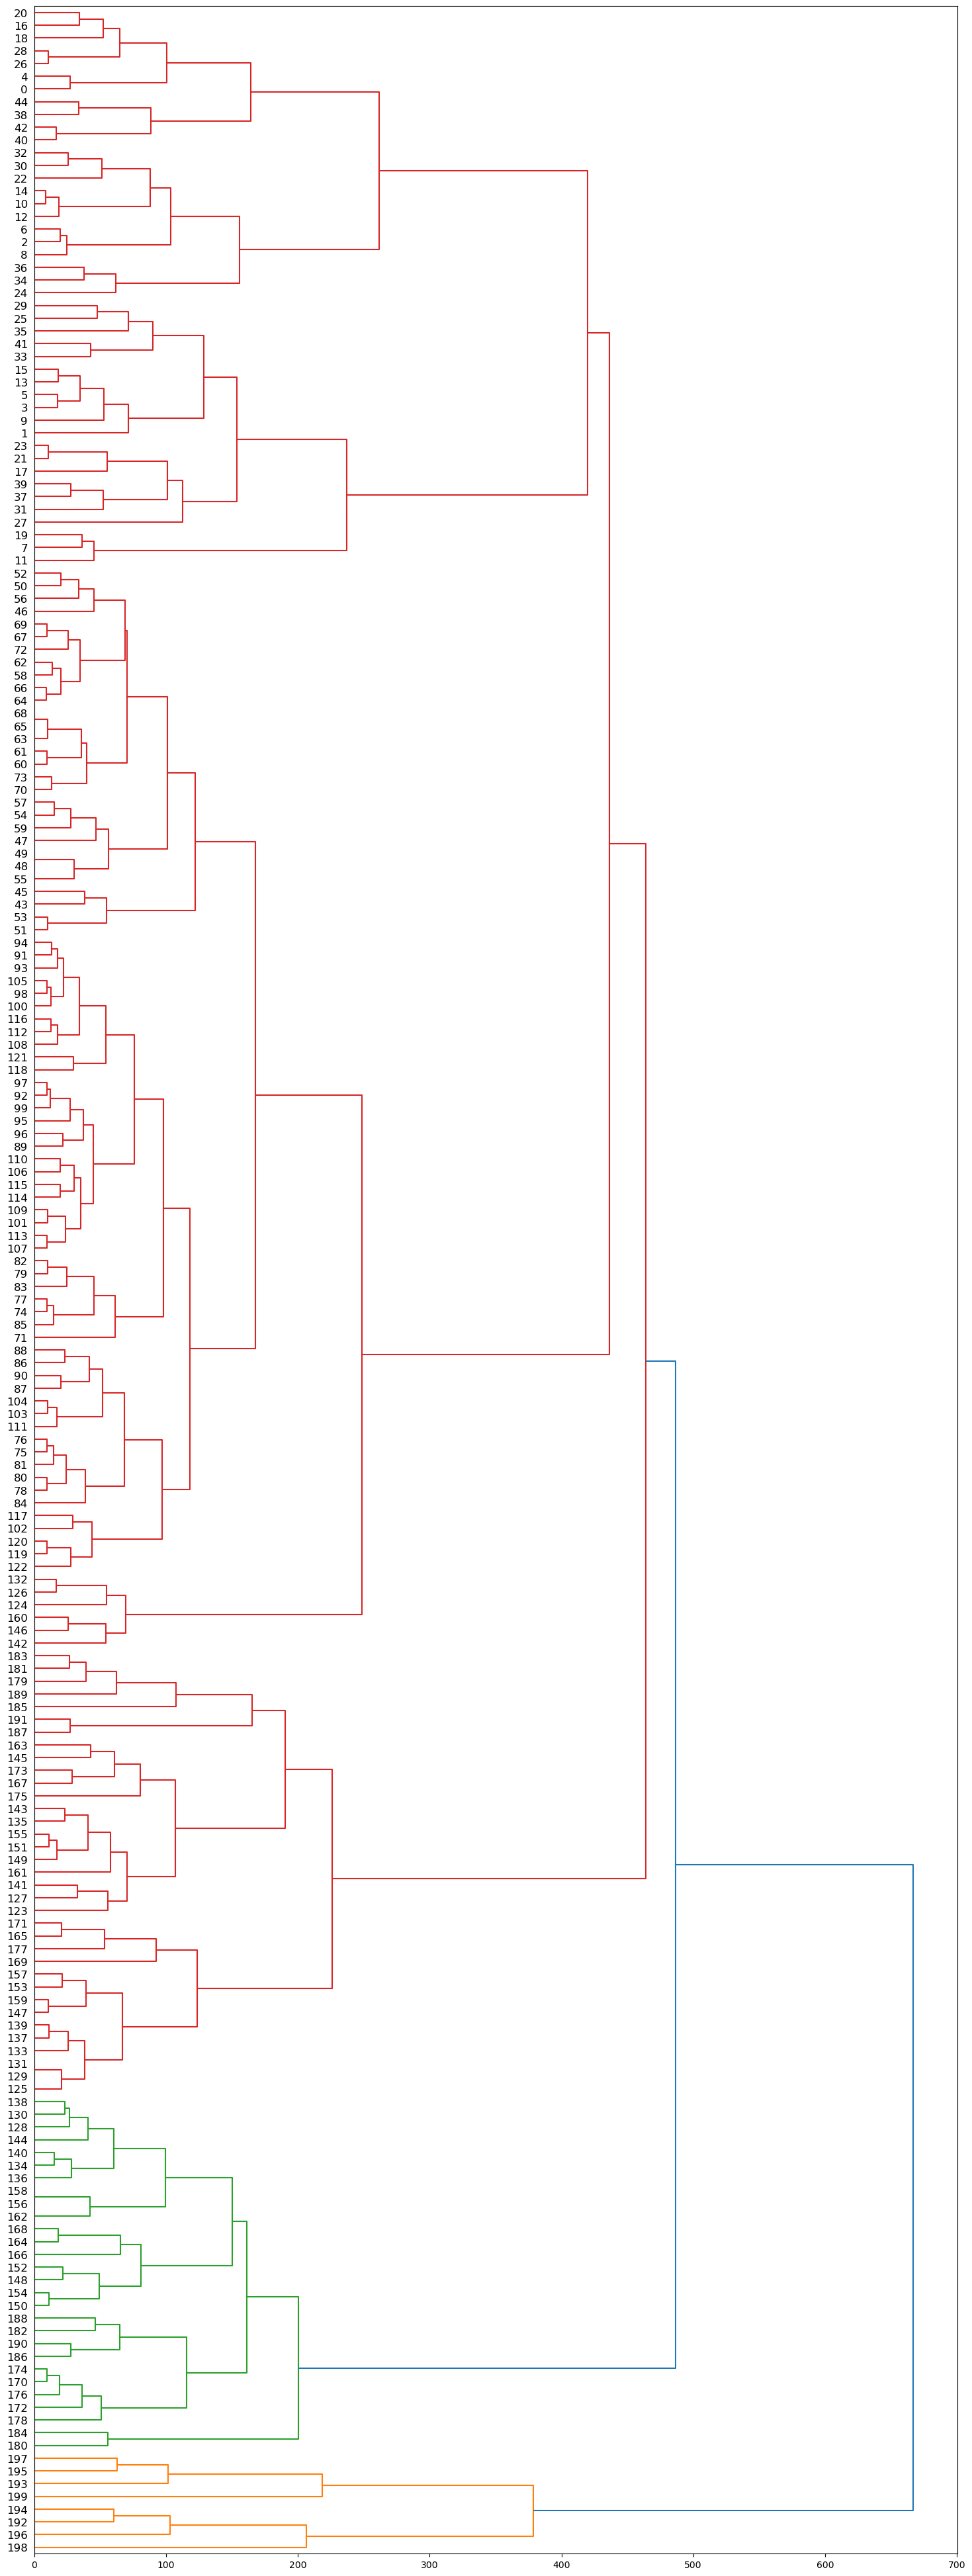

In [26]:
dist = distance_matrix(filtered_dataset, filtered_dataset) # Constructing the distance matrix
Z = hierarchy.linkage(dist, 'average') 
plt.figure(figsize=(18, 50))
dendrogram = hierarchy.dendrogram(Z, leaf_rotation=0, leaf_font_size=12, orientation='right')

### DBScan Clustering

基于密度的聚类（例如 DBScan）会寻找与低密度区域分开的高密度区域。 密度是指指定半径内的点数。其中涉及两个重要参数。

eps: d 两个样本之间的最大距离，其中一个样本被视为位于另一个样本的邻域内。 这不是簇内点距离的最大界限。 这是最重要的 DBSCAN 参数，需要根据数据集和距离函数进行适当选择。

min_samples：被视为核心点的点的邻域中的样本数（或总权重）。 这包括要点本身。

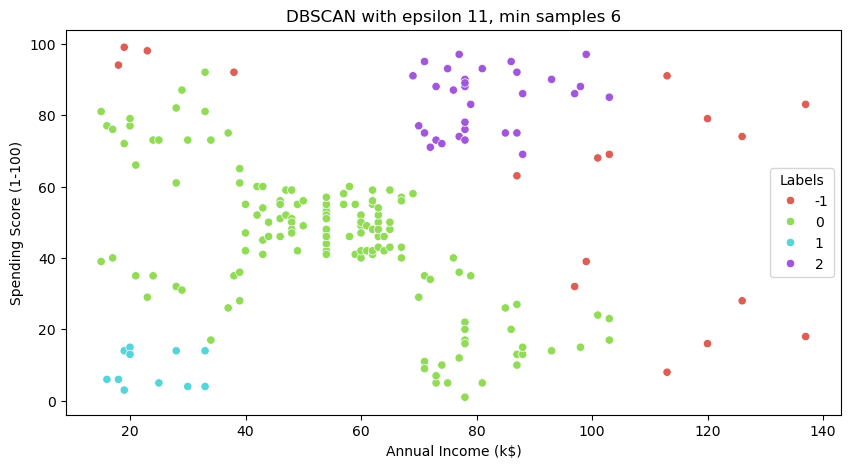

In [27]:
db = DBSCAN(eps=11, min_samples=6).fit(filtered_dataset)
filtered_dataset['Labels'] = db.labels_
plt.figure(figsize=(10, 5))
sns.scatterplot(x=filtered_dataset['Annual Income (k$)'],
                y=filtered_dataset['Spending Score (1-100)'],
                hue=filtered_dataset['Labels'], 
                palette=sns.color_palette('hls', np.unique(db.labels_).shape[0]))
plt.title('DBSCAN with epsilon 11, min samples 6')
plt.show()

聚类解释

现在我们可以看到，DbScan Clustering 现在引入了一些新的噪声点或异常值，也标记为 -1。

DbScan 聚类似乎在 eps 和 min_samples 的当前值下形成 3 个聚类。 年收入在 20k 到 100k 之间、支出得分在 20 到 100 之间的人似乎形成一个簇，并被标记为绿色。

支出得分在 70 到 100 之间、年收入在 70k 到 100k 之间的人聚集在一起，并分配给他们紫色。

我们可以看到一小群年收入低、消费评分低的客户积分。 该簇在上图中被标记为蓝色。

## Conclusion

KMeans 和层次聚类有些相似，聚类和层次聚类将 KMeans 聚类中独立的两个聚类合并为一个。

DbScan 产生了完全不同的结果，还指出了噪声或异常值。 异常值包括那些年收入较低但支出得分似乎很高的客户。 同样的异常值还向我们指出了那些年收入高但支出得分低的客户。